In [3]:
# Georgie Suico
# This notebook is intended to explore warehouse data in Riverside County for my group's project, with the goal of looking at acreage dataa.

In [4]:
#importing pandas
import pandas as pd

In [5]:
#loading first data file on warehouse information
wh = pd.read_csv('warehouse (1).csv')

In [6]:
#gathering basic info on dataset
wh.shape

(9467, 5)

In [7]:
wh.head()

,Assessor parcel number,Building classification,Year built,Acres,Building sq.ft.
0,051513138,storage building,2021,275,7778022
1,046323158,distribution warehouse,2003,225,6381893
2,049202124,storage warehouse,2016,151,4273702
3,668280017,warehouse/dry storage,1910,128,3633789
4,046323161,distribution warehouse,2018,106,3014158


In [8]:
wh.info

<bound method DataFrame.info of      Assessor parcel number             Building classification  Year built  \
0                 051513138                    storage building        2021   
1                 046323158              distribution warehouse        2003   
2                 049202124                   storage warehouse        2016   
3                 668280017               warehouse/dry storage        1910   
4                 046323161              distribution warehouse        2018   
...                     ...                                 ...         ...   
9462           8414-005-002  Warehousing, Distribution, Storage        1952   
9463              013617132                   storage warehouse        2019   
9464              016118324              distribution warehouse        2002   
9465           8382-001-056  Warehousing, Distribution, Storage        1973   
9466           2604-035-012  Warehousing, Distribution, Storage        1991   

      Acres  Buildi

In [9]:
#looking at info by column
wh['Acres'].head()

0    275
1    225
2    151
3    128
4    106
Name: Acres, dtype: int64

In [10]:
#Trying to find average acreage per warehouse
wh['Acres'].mean()

5.871236928277173

In [11]:
#finding the median
wh['Acres'].median()

3.0

In [12]:
#generating statistics for acreage
wh['Acres'].describe()

count    9467.000000
mean        5.871237
std         9.138117
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       275.000000
Name: Acres, dtype: float64

<AxesSubplot: ylabel='Frequency'>

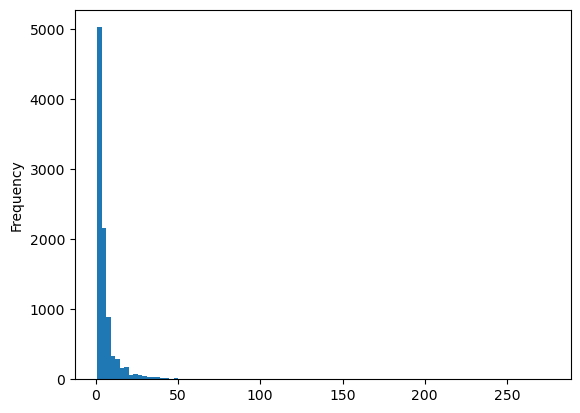

In [13]:
#creating a histogram for acreage
wh['Acres'].plot.hist(bins=100)

In [14]:
#sorting warehouses by acreage size
wh.sort_values(by='Acres', ascending=False)

,Assessor parcel number,Building classification,Year built,Acres,Building sq.ft.
0,051513138,storage building,2021,275,7778022
1,046323158,distribution warehouse,2003,225,6381893
2,049202124,storage warehouse,2016,151,4273702
3,668280017,warehouse/dry storage,1910,128,3633789
4,046323161,distribution warehouse,2018,106,3014158
...,...,...,...,...,...
8145,5169-019-004,"Warehousing, Distribution, Storage",1962,1,36587
8144,102850103,storage warehouse,1999,1,36607
8143,6368-005-047,"Warehousing, Distribution, Storage",2015,1,36616
8142,8605-016-403,"Warehousing, Distribution, Storage",1987,1,36633


In [15]:
#sorting warehouses by year built
wh.sort_values(by='Year built', ascending=True)

,Assessor parcel number,Building classification,Year built,Acres,Building sq.ft.
4407,021126208,light industrial,1910,4,99982
4905,170350057,warehouse/dry storage,1910,3,84693
4019,291420008,light industrial,1910,4,111582
6438,7005-006-074,"Warehousing, Distribution, Storage",1910,2,55790
2467,132020019,light industrial,1910,6,170366
...,...,...,...,...,...
1453,8208-027-020,"Warehousing, Distribution, Storage",2022,9,264397
2416,219330040,light industrial,2022,6,173434
40,303934116,distribution warehouse,2022,60,1690513
146,016314118,light industrial,2022,36,1016562


In [42]:
#removing 1910 value (which is used to indicate unknown warehouse construction date
wh.drop(wh.loc[wh['Year built']==1910].index, inplace=True)

In [31]:
#checking for empty values
wh.columns[wh.isna().all()].tolist()

[]

<AxesSubplot: title={'center': 'Growth of Warehouse Acreage Over Time'}, xlabel='Year built'>

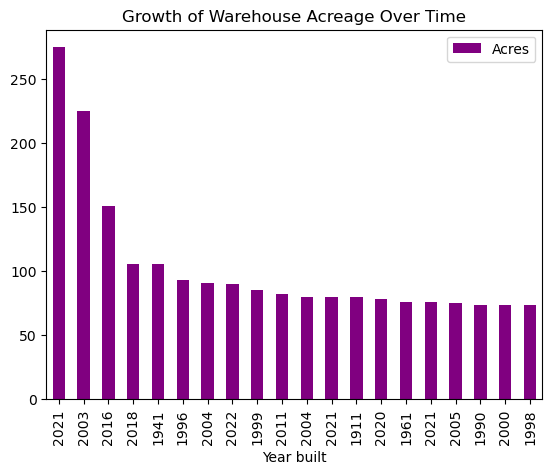

In [32]:
#plotting year built and acreage
wh.head(20).plot.bar(x='Year built',
                     y='Acres',
                    title = 'Growth of Warehouse Acreage Over Time',
                    color='purple')

<AxesSubplot: title={'center': 'Growth of Warehouse Acreage Over Time'}, ylabel='Year built'>

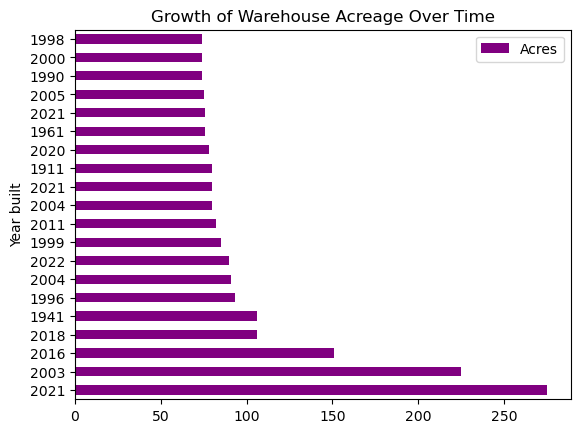

In [33]:
#trying it as a horizontal chart
wh.head(20).plot.barh(x='Year built',
                     y='Acres',
                    title = 'Growth of Warehouse Acreage Over Time',
                    color='purple')

In [34]:
wh['Year built'].value_counts()

1989    313
1987    298
1990    282
2001    253
1988    250
       ... 
1943      1
1914      1
1912      1
1933      1
1917      1
Name: Year built, Length: 108, dtype: int64

In [43]:
#filtering out unwanted columns
desired_columns=['Acres','Year built', 'Building sq.ft.']

In [44]:
#generating sample to test results
wh[desired_columns].sample(5)

,Acres,Year built,Building sq.ft.
2290,6,2006,183279
8165,1,1997,36392
4984,3,1952,82561
6876,2,2004,50031
414,21,2002,604758


In [45]:
#creating a copy so that the table doesn't revert to the original data
wh_new=wh[desired_columns].copy()
wh_new

,Acres,Year built,Building sq.ft.
0,275,2021,7778022
1,225,2003,6381893
2,151,2016,4273702
4,106,2018,3014158
5,106,1941,2990190
...,...,...,...
9462,1,1952,28019
9463,1,2019,28015
9464,1,2002,28014
9465,1,1973,28014


In [50]:
#bringing plotly in
import plotly.express as px

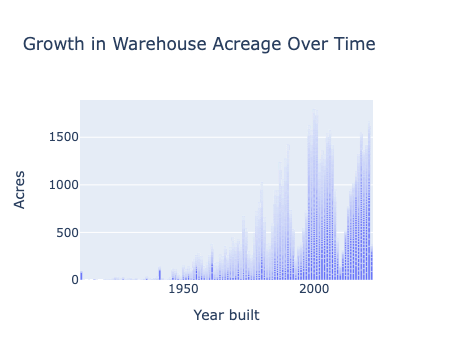

In [53]:
#trying to use plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Acres',
             title ='Growth in Warehouse Acreage Over Time'
            )
fig.show()

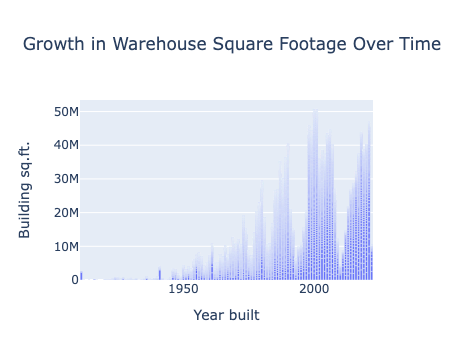

In [49]:
#trying to use plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Building sq.ft.',
             title ='Growth in Warehouse Square Footage Over Time'
            )
fig.show()